<a href="https://colab.research.google.com/github/austinbennysmith/OSOM-ERDDAP/blob/master/NERACOOS_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook looks at data from the [NERACOOS ERDDAP server](http://www.neracoos.org/erddap/index.html), and works with all the datasets there whose chlorophyll data fall within the OSOM region. This is all tabular buoy data. There are 6 buoy locations: Mount View, Quonset Point, Conimicut Point, Greenwich Bay, North Prudence, and Poppasquash Point. For each location, the server has one dataset for surface data, and one for bottom data. The code below will plot the surface and bottom chlorophyll together against time for each location. Some of the data, particularly the bottom data, has really bizarre values - extremely high values, or even negative values. Not sure why this is.

In [ ]:
#First, some installations and imports:
!pip install netCDF4
import matplotlib.pyplot as plt
import requests
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import datetime
from datetime import datetime as dt

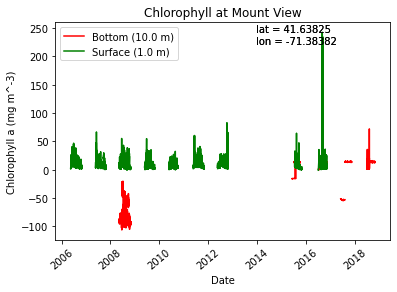

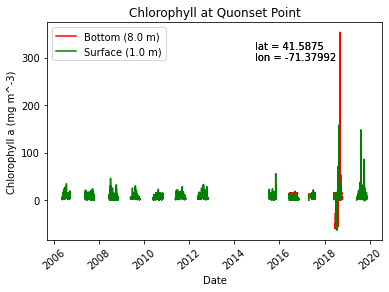

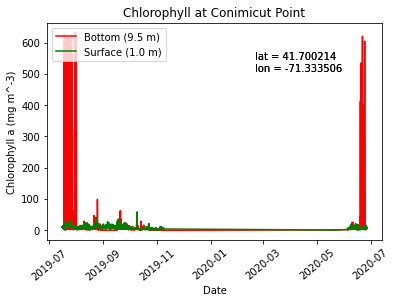

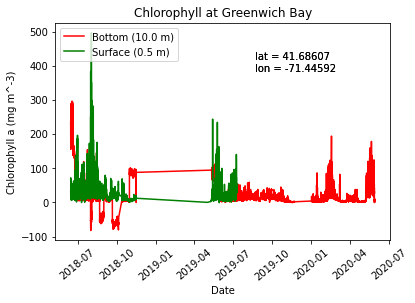

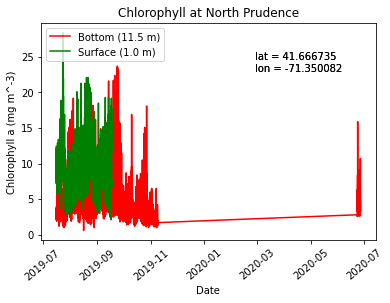

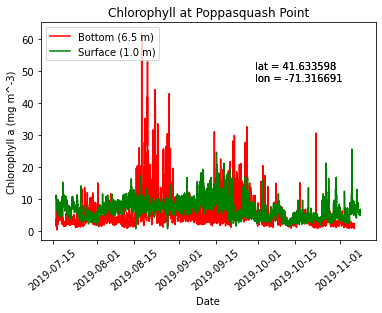

In [2]:
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
#For saving things in drive:
#from google.colab import drive
#drive.mount('/content/gdrive')
#images_dir = '/content/gdrive/Shared drives/BFK_BOG/SURF_UG/Benny/Images/Phytoplankton_averages/Buoy Data'
#Making a dictionary whose keys are the locations, and whose values are the dataset IDs for surface & bottom (I'll use the dataset IDs when making the url, and I'll loop through both surface and bottom for each location to make the plots):
station_dict = {'Mount View': ['URI_168-MV_BottomSonde', 'URI_168-MV_SurfaceSonde'], 
                'Quonset Point': ['URI_169-QP_BottomSonde', 'URI_169-QP_SurfaceSonde'],
                'Conimicut Point': ['URI_CPoint_BottomSonde', 'URI_CPoint_SurfaceSonde'],
                'Greenwich Bay': ['URI_GBay_BottomSonde', 'URI_GBay_SurfaceSonde'],
                'North Prudence': ['URI_NP_BottomSonde', 'URI_NP_SurfaceSonde'],
                'Poppasquash Point': ['URI_PP_BottomSonde', 'URI_PP_SurfaceSonde']}
colors = ['red', 'green']
labels = ['Bottom', 'Surface']
fig, ax = plt.subplots()
#the datasets all start & end at the same point. The ending point will change over time as the datasets are updated
start = '2006-05-17T11%3A45%3A01Z'
end = '2020-06-26T12%3A00%3A00Z'
for x in station_dict: #looping through each location
  for k in station_dict[x]: #looping through both dataset IDs at location x
    #making the url, opening the dataset:
    url = 'http://www.neracoos.org/erddap/tabledap/'+k+'.nc?time%2Cstation_name%2Clatitude%2Clongitude%2Cdepth%2Cchlorophyll&time%3E='+start+'&time%3C='+end
    r = requests.get(url, allow_redirects=True)
    open('test.nc', 'wb').write(r.content)
    nc = NetCDFFile('test.nc')
    nc
    timearray = []
    time = nc.variables['time'][:]
    #making a list of times that is better for graphing:
    for i in time:
      timearray.append(dt.fromtimestamp(i))
    #defining some variables:
    chla = nc.variables['chlorophyll'][:]
    lat = nc.variables['latitude'][:]
    lon = nc.variables['longitude'][:]
    depth = nc.variables['depth'][:]
    #Removing repeats from the latitude, longitude, and depth lists so that I can more easily put those values as text in each plot
    lat = list(dict.fromkeys(lat))
    lon = list(dict.fromkeys(lon))
    depth = list(dict.fromkeys(depth))
    #using the single values for lat and lon as text to put on the plot:
    coordstring = '''lat = '''+str(lat)+'''
lon = '''+str(lon)
    #need to format the string a bit to make the plot prettier:
    coordstring = coordstring.replace('[', '')
    coordstring = coordstring.replace(']', '')
    depthstr = str(depth)
    depthstr = depthstr.replace('[', '')
    depthstr = depthstr.replace(']', '')
    plt.plot(timearray, chla, label = labels[station_dict[x].index(k)]+' ('+depthstr+' m)', color = colors[station_dict[x].index(k)])
    plt.xticks(rotation=40)
    plt.text(0.6, 0.9, coordstring, transform = ax.transAxes)
    plt.title('Chlorophyll at '+x)
    plt.xlabel('Date')
    plt.ylabel('Chlorophyll a (mg m^-3)')
    plt.legend(loc='upper left')
    #plt.savefig(f"{images_dir}/Chlorophyll "+x+".png")
  plt.show()